# Customer Segmentation using RFM Approach

- In this project, you will analyze and segment the customers of an e-commerce companyby using the RFM approach.This will enable the e-commerce company to optimize their retention and acquisition strategies.
- E-commerce stores which became success stories were successful in targeting the desired customers. One of the techniques by which they were able to achieve this was customer segmentation i.e. by segmenting the existing customers based on frequency of purchases, monetary value etc. E-commerce stores who designed market strategies based on mass marketing soon realized the need of customer segmentation as an alternative to save cost and efforts in the digital sphere. In a real-world segmentation scenario, there might be hundreds of variables which can be used but broadly they segment the customers by the following characteristics:

In [3]:
import os
os.getcwd()

'C:\\Users\\mayan\\Projects'

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

import warnings as ww
ww.filterwarnings('ignore')

In [5]:
df = pd.read_csv('C:\\Users\\mayan\\OneDrive\\Documents\\Dataset\\Project dataset\\E-com_Data.csv')
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoieNo           537979 non-null  float64
 3   Date of purchase   537979 non-null  object 
 4   Quantity           537979 non-null  float64
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 49.5+ MB


In [7]:
# Summary of the Data
df.describe()

,CustomerID,InvoieNo,Quantity,price per Unit,Price,Sold as set
count,404189.000000,537979.000000,537979.000000,537979.000000,537979.000000,0.0
mean,2181.909035,385017.572063,9.343339,378.339062,2161.414593,NaN
std,1252.681881,13426.052649,27.623322,440.048823,4538.487177,NaN
min,2.000000,361429.000000,-2003.000000,1.000000,-10152.000000,NaN
25%,1207.000000,372961.000000,1.000000,169.000000,451.000000,NaN
50%,2078.000000,385706.000000,3.000000,261.000000,1194.000000,NaN
75%,3291.000000,396873.000000,10.000000,456.000000,2232.000000,NaN
max,4372.000000,406651.000000,3186.000000,64973.000000,90400.000000,NaN


In [8]:
# Shape of the data
df.shape

(541116, 12)

In [9]:
# Checking for Duplicates
df.duplicated().sum()

3145

In [10]:
df=df.drop_duplicates(ignore_index=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.columns

Index(['CustomerID', 'Item Code', 'InvoieNo', 'Date of purchase', 'Quantity',
       'Time', 'price per Unit', 'Price', 'Shipping Location',
       'Cancelled_status', 'Reason of return', 'Sold as set'],
      dtype='object')

In [13]:
df=df[['CustomerID','InvoieNo','Date of purchase','Price']]
df.head()

,CustomerID,InvoieNo,Date of purchase,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0


In [14]:
# Percentage of missing values
df.isnull().sum()/len(df)*100

CustomerID          24.869370
InvoieNo             0.000186
Date of purchase     0.000186
Price                0.000186
dtype: float64

In [15]:
df=df.dropna(subset=['CustomerID'])

In [16]:
df.isnull().sum()

CustomerID          0
InvoieNo            0
Date of purchase    0
Price               0
dtype: int64

In [17]:
df.shape

(404181, 4)

In [18]:
df.head()

,CustomerID,InvoieNo,Date of purchase,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0


In [19]:
# Identifying how many unique customers we have
df['CustomerID'].nunique()

4349

In [20]:
df['Date of purchase']=pd.to_datetime(df['Date of purchase'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404181 entries, 0 to 537940
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   CustomerID        404181 non-null  float64       
 1   InvoieNo          404181 non-null  float64       
 2   Date of purchase  404181 non-null  datetime64[ns]
 3   Price             404181 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 15.4 MB


In [22]:
df=df.rename(columns = {'InvoieNo':'Invoice_No','Date of purchase':'Date'})

In [23]:
df.head()

,CustomerID,Invoice_No,Date,Price
0,4355.0,398177.0,2017-10-29,1926.0
1,4352.0,394422.0,2017-10-05,1740.0
2,4352.0,394422.0,2017-10-12,1866.0
3,4352.0,388633.0,2017-08-22,1869.0
4,4352.0,394422.0,2017-10-10,1888.0


In [24]:
df['Date'].describe()

count                           404181
mean     2017-07-15 15:28:28.388073472
min                2016-12-02 00:00:00
25%                2017-04-12 00:00:00
50%                2017-08-05 00:00:00
75%                2017-10-26 00:00:00
max                2017-12-19 00:00:00
Name: Date, dtype: object

In [25]:
import datetime
new_date=datetime.datetime(2017,12,20)
new_date

# To check how old the customer is(recency) we have new_date, so if a customer came on
# 2017-12-19 then that customer is 1 day old

datetime.datetime(2017, 12, 20, 0, 0)

In [26]:
RFMApproach=df.groupby('CustomerID').agg({'Date':lambda x:(new_date-x.max()).days,
                                         'Invoice_No':lambda x:x.count(),
                                         'Price':lambda x:x.sum()})

In [27]:
RFMApproach.rename(columns={'Date':'Recency','Invoice_No':'Frequency',
                           'Price':'Monetory'},inplace=True)

In [28]:
RFMApproach.reset_index()

,CustomerID,Recency,Frequency,Monetory
0,2.0,4,182,553704.0
1,3.0,77,27,257404.0
2,4.0,19,72,176613.0
3,5.0,311,16,41976.0
4,6.0,37,84,151822.0
...,...,...,...,...
4344,4368.0,278,10,20480.0
4345,4369.0,181,7,10774.0
4346,4370.0,9,13,24962.0
4347,4371.0,4,754,280608.0


In [29]:
RFMApproach.describe()

,Recency,Frequency,Monetory
count,4349.000000,4349.000000,4.349000e+03
mean,93.299379,92.936537,2.299380e+05
std,100.701315,232.086935,8.572589e+05
min,1.000000,1.000000,-5.037200e+04
25%,18.000000,17.000000,3.814800e+04
50%,51.000000,42.000000,8.365500e+04
75%,144.000000,101.000000,2.056120e+05
max,381.000000,7970.000000,3.553619e+07


In [30]:
# Splitting the data into 4 segment using quantile method
quantiles=RFMApproach.quantile(q=[0.25,0.5,0.75])
quantiles=quantiles.to_dict()
quantiles

{'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 144.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 101.0},
 'Monetory': {0.25: 38148.0, 0.5: 83655.0, 0.75: 205612.0}}

In [31]:
def Recency_value(x,p,d):
    if x<=d[p][0.25]:
        return 1
    elif x<=d[p][0.5]:
        return 2
    elif x<=d[p][0.75]:
        return 3
    else:
        return 4

In [32]:
def Freq_Monetory_Value(x,p,d):
    if x<=d[p][0.25]:
        return 4
    elif x<=d[p][0.5]:
        return 3
    elif x<=d[p][0.75]:
        return 2
    else:
        return 1

In [33]:
RFMApproach.columns

Index(['Recency', 'Frequency', 'Monetory'], dtype='object')

In [34]:
RFMApproach['R']=RFMApproach['Recency'].apply(Recency_value,args=('Recency',quantiles))
RFMApproach['F']=RFMApproach['Frequency'].apply(Freq_Monetory_Value,args=('Recency',quantiles))
RFMApproach['M']=RFMApproach['Monetory'].apply(Freq_Monetory_Value,args=('Monetory',quantiles))

In [35]:
RFMApproach.reset_index()

,CustomerID,Recency,Frequency,Monetory,R,F,M
0,2.0,4,182,553704.0,1,1,1
1,3.0,77,27,257404.0,3,3,1
2,4.0,19,72,176613.0,2,2,2
3,5.0,311,16,41976.0,4,4,3
4,6.0,37,84,151822.0,2,2,2
...,...,...,...,...,...,...,...
4344,4368.0,278,10,20480.0,4,4,4
4345,4369.0,181,7,10774.0,4,4,4
4346,4370.0,9,13,24962.0,1,4,4
4347,4371.0,4,754,280608.0,1,1,1


In [36]:
RFMApproach['RFM']=RFMApproach[['R','F','M']].sum(axis=1)
RFMApproach.reset_index()

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM
0,2.0,4,182,553704.0,1,1,1,3
1,3.0,77,27,257404.0,3,3,1,7
2,4.0,19,72,176613.0,2,2,2,6
3,5.0,311,16,41976.0,4,4,3,11
4,6.0,37,84,151822.0,2,2,2,6
...,...,...,...,...,...,...,...,...
4344,4368.0,278,10,20480.0,4,4,4,12
4345,4369.0,181,7,10774.0,4,4,4,12
4346,4370.0,9,13,24962.0,1,4,4,9
4347,4371.0,4,754,280608.0,1,1,1,3


In [37]:
RFMApproach['RFM'].nunique()

10

In [38]:
Loyalty_Level=['Platinum','Gold','Silver','Bronze']
score_cuts=pd.qcut(RFMApproach.RFM,q=4,labels=Loyalty_Level)
RFMApproach['Loyalty_Level']=score_cuts.values
RFMApproach=RFMApproach.reset_index()
RFMApproach

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM,Loyalty_Level
0,2.0,4,182,553704.0,1,1,1,3,Platinum
1,3.0,77,27,257404.0,3,3,1,7,Gold
2,4.0,19,72,176613.0,2,2,2,6,Gold
3,5.0,311,16,41976.0,4,4,3,11,Bronze
4,6.0,37,84,151822.0,2,2,2,6,Gold
...,...,...,...,...,...,...,...,...,...
4344,4368.0,278,10,20480.0,4,4,4,12,Bronze
4345,4369.0,181,7,10774.0,4,4,4,12,Bronze
4346,4370.0,9,13,24962.0,1,4,4,9,Silver
4347,4371.0,4,754,280608.0,1,1,1,3,Platinum


In [39]:
RFMApproach.to_csv('Final_Segmentation.csv')

# Visualization

In [41]:
RFMApproach.columns

Index(['CustomerID', 'Recency', 'Frequency', 'Monetory', 'R', 'F', 'M', 'RFM',
       'Loyalty_Level'],
      dtype='object')

In [42]:
final_report = RFMApproach.groupby('Loyalty_Level')[['Recency', 'Frequency', 'Monetory','CustomerID']].agg({
    'Recency':'sum', 'Frequency':'sum', 'Monetory':'sum','CustomerID':'nunique'}).reset_index()
final_report

,Loyalty_Level,Recency,Frequency,Monetory,CustomerID
0,Platinum,20307,281806,734676665.0,1140
1,Gold,83049,87777,193077722.0,1408
2,Silver,121864,25177,52720179.1,983
3,Bronze,180539,9421,19525781.0,818


In [43]:
final_report = final_report.rename(columns = {'CustomerID':'NumBuyers'})
final_report['Percent'] = round(final_report['NumBuyers']/final_report.NumBuyers.sum()*100,2)
final_report

,Loyalty_Level,Recency,Frequency,Monetory,NumBuyers,Percent
0,Platinum,20307,281806,734676665.0,1140,26.21
1,Gold,83049,87777,193077722.0,1408,32.38
2,Silver,121864,25177,52720179.1,983,22.60
3,Bronze,180539,9421,19525781.0,818,18.81


In [44]:
final_report = final_report[['Loyalty_Level','NumBuyers','Percent']]
final_report

,Loyalty_Level,NumBuyers,Percent
0,Platinum,1140,26.21
1,Gold,1408,32.38
2,Silver,983,22.60
3,Bronze,818,18.81


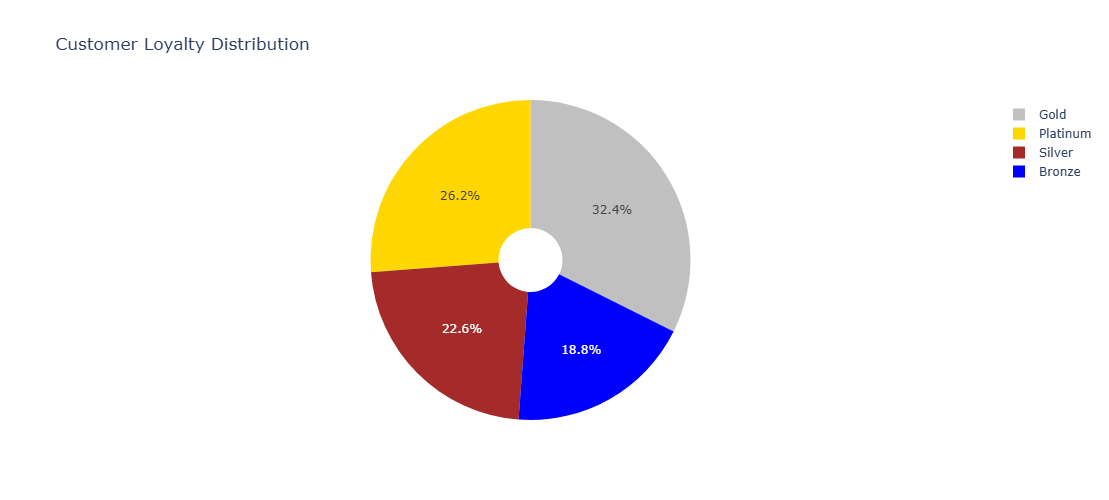

In [109]:
import plotly.express as px
colors = ['gold', 'silver', 'brown', 'blue']
fig = px.pie(final_report,names='Loyalty_Level', values='Percent',title='Customer Loyalty Distribution', color='Loyalty_Level', 
             color_discrete_sequence=colors, hole=0.2) 
fig.update_layout(width=700, height=500)
fig.show()